In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sbn
from google.colab import files


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_2020 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/weather_weybourne_2020.csv',sep=',', skiprows= 280, header ='infer',skipfooter =1)
data_2021 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/weather_weybourne_2021.csv',sep=',', skiprows= 280, header ='infer',skipfooter =1)
#load cromer tidal data
tide_2020 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/2020CRO.txt',sep='\s+', skiprows= 11, header =None)
tide_2021 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/2021CRO.txt',sep='\s+', skiprows= 11, header =None)

sun = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/East_Anglia_sunshine.csv',sep='\s+', skiprows=5, header ='infer')
rainfall = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/East_Anglia_rainfall.csv',sep='\s+', skiprows= 5, header ='infer')




<ipython-input-3-cabca5bbea9a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_2020 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/weather_weybourne_2020.csv',sep=',', skiprows= 280, header ='infer',skipfooter =1)
<ipython-input-3-cabca5bbea9a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_2021 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Blakeney_project/Climate_data_blakeney/weather_weybourne_2021.csv',sep=',', skiprows= 280, header ='infer',skipfooter =1)


In [ ]:
sun = sun.iloc [110:112,0:13]

sun_data = pd.DataFrame({'date':[],'sun':[]})
rainfall = rainfall.iloc [184:186,0:13]
rain_data = pd.DataFrame({'date':[],'rain':[]})

a = 0
for i in sun.columns[1:13]:
  a = a+1
  sun_data.at[a-1,'date'] = pd.to_datetime(f'2020-{a}-15')
  sun_data.at[a-1,'sun'] = sun.loc[110,i]
  rain_data.at[a-1,'date'] = pd.to_datetime(f'2020-{a}-15')
  rain_data.at[a-1,'rain'] = rainfall.loc[184,i]

for i in sun.columns[1:13]:
  print(a-11)
  a = a+1
  sun_data.at[a,'date'] = pd.to_datetime(f'2021-{a-12}-15')
  sun_data.at[a,'sun'] = sun.loc[111,i]
  rain_data.at[a,'date'] = pd.to_datetime(f'2021-{a-12}-15')
  rain_data.at[a,'rain'] = rainfall.loc[185,i]



1
2
3
4
5
6
7
8
9
10
11
12


<ipython-input-4-b6faa52adf9c>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020-01-15 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sun_data.at[a-1,'date'] = pd.to_datetime(f'2020-{a}-15')
<ipython-input-4-b6faa52adf9c>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020-01-15 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rain_data.at[a-1,'date'] = pd.to_datetime(f'2020-{a}-15')


In [ ]:
data_2020_int = data_2020[['ob_time','air_temperature','msl_pressure','stn_pres','drv_hr_sun_dur']]
data_2021_int = data_2021[['ob_time','air_temperature','msl_pressure','stn_pres','drv_hr_sun_dur']]
data_2021_int

data_2021_int.loc[:,'ob_time']

,ob_time
0,2021-01-01 00:00:00
1,2021-01-01 01:00:00
2,2021-01-01 02:00:00
3,2021-01-01 03:00:00
4,2021-01-01 04:00:00
...,...
8631,2021-12-31 19:00:00
8632,2021-12-31 20:00:00
8633,2021-12-31 21:00:00
8634,2021-12-31 22:00:00


In [ ]:
data_2021_int.loc[:,'ob_time'] = pd.to_datetime(data_2021_int.loc[:,'ob_time'],errors='raise', format ='mixed')
data_2020_int.loc[:,'ob_time'] = pd.to_datetime(data_2020_int.loc[:,'ob_time'],errors='raise')


In [ ]:
data_2021_int.columns =['date','air T(C)','msl_pressure (hPa)','stn_pres(hPa)','sunshine(h)']
data_2020_int.columns =['date','air T(C)','msl_pressure (hPa)','stn_pres(hPa)','sunshine(h)']
tide_2020.columns = ['Cycle number', 'Date','Time','Level (m)','residual']
tide_2021.columns = ['Cycle number', 'Date','Time','Level (m)','residual']
data = pd.concat([data_2020_int,data_2021_int],ignore_index=True)
data = data.set_index('date')
tide_2020['Level (m)'] = tide_2020['Level (m)'].str.replace('M','')
tide_2020['residual'] = tide_2020['residual'].str.replace('M','')
tide_2020.loc[:,'Date'] = pd.to_datetime(tide_2020.loc[:,'Date'],errors='raise')
tide_2020.loc[:,'Time'] = pd.to_timedelta(tide_2020.loc[:,'Time'],errors='raise')
tide_2020['date'] =tide_2020['Date'] + tide_2020['Time']
tide_2020

tide_2021['Level (m)'] = tide_2021['Level (m)'].str.replace('M','')
tide_2021['residual'] = tide_2021['residual'].str.replace('M','')
tide_2021.loc[:,'Date'] = pd.to_datetime(tide_2021.loc[:,'Date'],errors='raise')
tide_2021.loc[:,'Time'] = pd.to_timedelta(tide_2021.loc[:,'Time'],errors='raise')
tide_2021['date'] =tide_2021['Date'] + tide_2021['Time']
data


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,air T(C),msl_pressure (hPa),stn_pres(hPa),sunshine(h)
date,,,,
2020-01-01 00:00:00,3.7,1032.7,1030.0,NaN
2020-01-01 01:00:00,3.5,1032.1,1029.4,NaN
2020-01-01 02:00:00,3.4,1031.5,1028.8,NaN
2020-01-01 03:00:00,4.6,1031.0,1028.4,NaN
2020-01-01 04:00:00,4.9,1030.5,1027.9,NaN
...,...,...,...,...
2021-12-31 19:00:00,12.5,1017.6,1015.1,NaN
2021-12-31 20:00:00,12.8,1017.8,1015.2,NaN
2021-12-31 21:00:00,12.6,1017.8,1015.3,NaN


In [ ]:
tide = pd.concat([tide_2020,tide_2021],ignore_index=True)
tide['Level (m)'] = tide['Level (m)'].str.replace('T','')
tide['residual'] = tide['residual'].str.replace('T','')
tide['Level (m)'] =pd.to_numeric(tide['Level (m)'],errors='raise')
tide['residual'] =pd.to_numeric(tide['residual'],errors='raise')
tide = tide.set_index('date')
tide

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Cycle number,Date,Time,Level (m),residual
date,,,,,
2020-01-01 00:00:00,1),2020-01-01 00:00:00,0 days 00:00:00,3.700,-0.177
2020-01-01 00:15:00,2),2020-01-01 00:00:00,0 days 00:15:00,3.558,-0.160
2020-01-01 00:30:00,3),2020-01-01 00:00:00,0 days 00:30:00,3.399,-0.149
2020-01-01 00:45:00,4),2020-01-01 00:00:00,0 days 00:45:00,3.213,-0.157
2020-01-01 01:00:00,5),2020-01-01 00:00:00,0 days 01:00:00,3.038,-0.147
...,...,...,...,...,...
2021-12-31 22:45:00,35036),2021-12-31 00:00:00,0 days 22:45:00,1.497,0.098
2021-12-31 23:00:00,35037),2021-12-31 00:00:00,0 days 23:00:00,1.495,0.100
2021-12-31 23:15:00,35038),2021-12-31 00:00:00,0 days 23:15:00,1.509,0.094


<ipython-input-41-b636c568be55>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  T_month = data.groupby(pd.Grouper(freq="1M")).mean()
<ipython-input-41-b636c568be55>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  T_mon_std = data.groupby(pd.Grouper(freq="1M")).std()
<ipython-input-41-b636c568be55>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tide_max = tide.groupby(pd.Grouper(freq="12H")).max()
<ipython-input-41-b636c568be55>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tide_min = tide.groupby(pd.Grouper(freq="12H")).min()
<ipython-input-41-b636c568be55>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq_5m = tide_max[tide_max['Level (m)']> 5].groupby(pd.Grouper(freq="1M")).size()
<ipython-input-41-b63

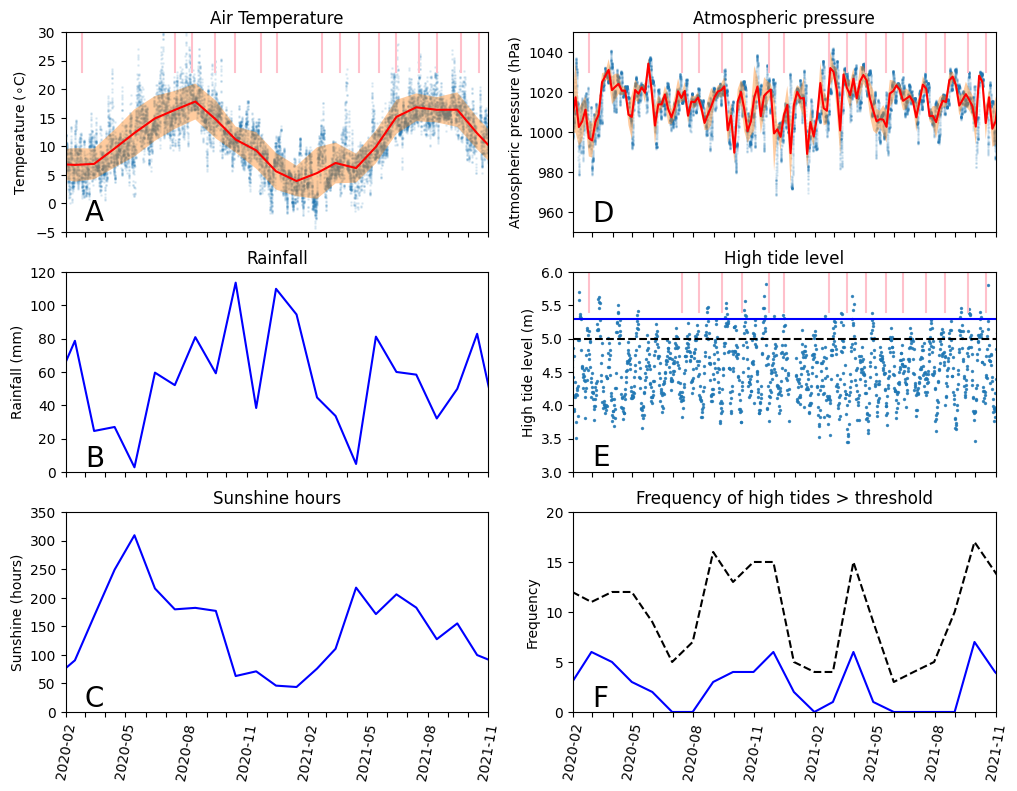

In [ ]:
import seaborn as sbn
import datetime

T_month = data.groupby(pd.Grouper(freq="1M")).mean()
T_month.index=T_month.index.map(lambda x : x.replace(day=15))
T_mon_std = data.groupby(pd.Grouper(freq="1M")).std()
T_mon_std.index=T_mon_std.index.map(lambda x : x.replace(day=15))

T_10day = data.groupby(pd.Grouper(freq="5D")).mean()
T_10std = data.groupby(pd.Grouper(freq="5D")).std()

T_7day = data.groupby(pd.Grouper(freq="5D")).mean()
T_7std = data.groupby(pd.Grouper(freq="5D")).std()

tide_max = tide.groupby(pd.Grouper(freq="12H")).max()
tide_min = tide.groupby(pd.Grouper(freq="12H")).min()
#take the freqency of when the tide is greater than 5 m and 5.5 m, respectively
freq_5m = tide_max[tide_max['Level (m)']> 5].groupby(pd.Grouper(freq="1M")).size()
freq_5m2 = tide_max[tide_max['Level (m)']> 5.2].groupby(pd.Grouper(freq="1M")).size()
freq_5m4 = tide_max[tide_max['Level (m)']> 5.4].groupby(pd.Grouper(freq="1M")).size()
freq_5m5 = tide_max[tide_max['Level (m)']> 5.5].groupby(pd.Grouper(freq="1M")).size()
freq_5m3 = tide_max[tide_max['Level (m)']> 5.3].groupby(pd.Grouper(freq="1M")).size()
freq_5m.columns = ['freq']
freq_5m2.columns = ['freq']
freq_5m4.columns = ['freq']
freq_5m5.columns = ['freq']
freq_5m3.columns = ['freq']
fig, axs = plt.subplots(nrows = 3, ncols = 2,figsize=(12, 10))
#axs.plot(data.index,data['air T(C)'])
min_t = pd.to_datetime(['2020-01-01'])
max_t = pd.to_datetime(['2021-11-01'])
tick = pd.to_datetime(
    ['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01',
                        '2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01'])
label = ['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01',
                        '2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01']
tick2 = pd.to_datetime(
  ['2020-02-01','2020-05-01','2020-08-01','2020-11-01',
                      '2021-02-01','2021-05-01','2021-08-01','2021-11-01'])
label2= (
  ['2020-02','2020-05','2020-08','2020-11',
                      '2021-02','2021-05','2021-08','2021-11'])
sampling_date = pd.to_datetime(['2020-02-26','2020-07-15','2020-08-10','2020-09-14','2020-10-14','2020-11-23','2020-12-16','2021-02-22',
                        '2021-03-22','2021-04-19','2021-05-19','2021-06-14','2021-07-19','2021-08-16','2021-09-20','2021-10-18'])



axs[0,0].scatter(data.index,data['air T(C)'], s = 1,alpha = 0.1)
axs[0,0].plot(T_month.index,T_month['air T(C)'],c ='r', linewidth = 1.5)
axs[0,0].fill_between(T_month.index, T_month['air T(C)']-T_mon_std['air T(C)'],T_month['air T(C)']+T_mon_std['air T(C)'], alpha = 0.4)
axs[0,0].set_ylim([-5 , 30])
axs[0,0].set_title('Air Temperature')
axs[0,0].set_ylabel('Temperature ($\circ$C)')
axs[0,0].text(pd.to_datetime(['2020-03-01']),-3,'A', fontsize = 20)
#axs[0,0].axhline(data['air T(C)'].mean())
for day in sampling_date:
  axs[0,0].axvline(day,c ='pink', ymin = 0.8)

for day in sampling_date:
  axs[0,1].axvline(day,c ='pink', ymin = 0.8)
axs[0,1].scatter(data.index,data['msl_pressure (hPa)'], s = 1,alpha = 0.1)
axs[0,1].plot(T_7day.index,T_7day['msl_pressure (hPa)'],c ='r', linewidth = 1.5)
axs[0,1].fill_between(T_7day.index, T_7day['msl_pressure (hPa)']-T_7std['msl_pressure (hPa)'],T_7day['msl_pressure (hPa)']+T_7std['msl_pressure (hPa)'], alpha = 0.4)
axs[0,1].set_ylim([950 , 1050])
axs[0,1].set_title('Atmospheric pressure')
axs[0,1].set_ylabel('Atmospheric pressure (hPa)')
axs[0,1].text(pd.to_datetime(['2020-03-01']),955,'D', fontsize = 20)


#axs[1].fill_between(msp_day.index, msp_day['msl_pressure (hPa)']-msp_std['msl_pressure (hPa)'],msp_day['msl_pressure (hPa)']-msp_std['msl_pressure (hPa)'], alpha = 0.3)
#axs[2].scatter(tide.index,tide['Level (m)'],s = 1,alpha = 0.1)
axs[1,1].scatter(tide_max.index,tide_max['Level (m)'],alpha = 0.8, s =2)
axs[1,1].set_ylim([3 , 6])
axs[1,1].axhline(y = 5, c = 'k',ls ='--')
axs[1,1].axhline(y = 5.3, c = 'blue',ls ='-')
axs[1,1].set_title('High tide level')
axs[1,1].set_ylabel('High tide level (m)')
axs[1,1].text(pd.to_datetime(['2020-03-01']),3.1,'E', fontsize = 20)
#axs[0,1].plot(tide_min.index,tide_min['Level (m)'])
#axs[0,1].plot(tide_mean_max.index,tide_mean_max['Level (m)'])
for day in sampling_date:
  axs[1,1].axvline(day,c ='pink', ymin = 0.8)

axs[1,0].plot(rain_data['date'],rain_data['rain'],c ='b', linewidth = 1.5)
axs[1,0].set_title('Rainfall')
axs[1,0].set_ylabel('Rainfall (mm)')
axs[1,0].text(pd.to_datetime(['2020-03-01']),3.1,'B', fontsize = 20)

axs[2,0].plot(sun_data['date'],sun_data['sun'],c ='b', linewidth = 1.5)
axs[2,0].set_title('Sunshine hours')
axs[2,0].set_ylabel('Sunshine (hours)')
axs[2,0].text(pd.to_datetime(['2020-03-01']),10,'C', fontsize = 20)
axs[1,0].set_ylim([0 , 120])
axs[2,1].set_ylabel('Frequency')
axs[2,1].text(pd.to_datetime(['2020-03-01']),0.5,'F', fontsize = 20)
axs[2,1].set_title('Frequency of high tides > threshold')
axs[2,1].set_ylim([0 , 20])
axs[2,1].plot(freq_5m.index, freq_5m, c ='k',ls ='--')
#axs[2,1].plot(freq_5m2.index, freq_5m2, c ='r',ls ='--')
#axs[2,1].plot(freq_5m4.index, freq_5m4, c = 'blue',ls ='--')
#axs[2,1].plot(freq_5m5.index, freq_5m5, c = 'cyan',ls ='--')
axs[2,1].plot(freq_5m3.index, freq_5m3, c = 'blue',ls ='-')

#axs[2,0].set_xlim([min_t, max_t])
#axs[2,1].set_xlim([min_t, max_t])


axs[2,0].set_ylim([0 , 350])
axs[2,0].set_ylim([0 , 350])
axs[2,1].set_xlim([datetime.date(2020, 2, 1), datetime.date(2021, 11, 1)])
axs[2,0].set_xlim([datetime.date(2020, 2, 1), datetime.date(2021, 11, 1)])

for a in axs.flatten():
  a.set_xticks(ticks = tick2, labels = label2)
  a.set_xticks(ticks = tick)
  a.set_xlim([datetime.date(2020, 2, 1), datetime.date(2021, 11, 1)])
  a.set_xlim([datetime.date(2020, 2, 1), datetime.date(2021, 11, 1)])


axs[2,0].set_ylim([0 , 350])
fig.autofmt_xdate(rotation=80,ha='center')


plt.savefig("climate_data.pdf",format = 'pdf', dpi=600)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

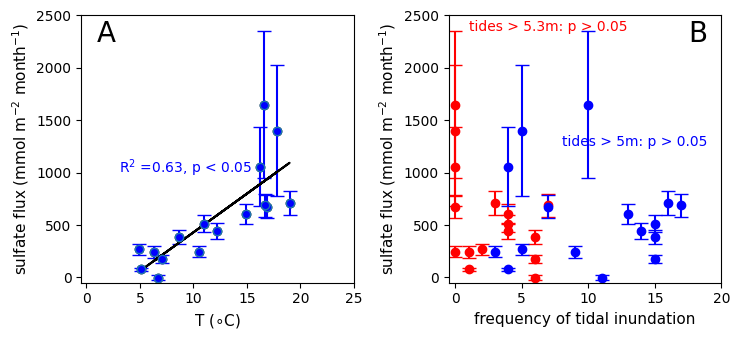

In [ ]:
###flux calculation
import numpy as np
from scipy import stats
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(7.5, 3.5))
#this file is stored in GCA_regection
freq = pd.read_excel('freq.xlsx')

##axs[1].scatter(freq[5.3],freq['Flux'], c ='r')
#axs[1].scatter(freq[5],freq['Flux'], c ='b')
axs[1].errorbar(freq[5.3],freq['Flux'], yerr=freq['Flux_err'],fmt='o', markerfacecolor = 'r', markeredgecolor = 'r',ecolor='r', capsize=5, linestyle='none')
axs[1].errorbar(freq[5],freq['Flux'], yerr=freq['Flux_err'],fmt='o', markerfacecolor = 'b',markeredgecolor = 'b',ecolor='b', capsize=5, linestyle='none')
axs[0].scatter(freq['T'], freq['Flux'], c ='k')
axs[0].errorbar(freq['T'], freq['Flux'], yerr=freq['Flux_err'],fmt='o', markerfacecolor = 'b',ecolor='b', capsize=5, linestyle='none')

m1, b1 = np.polyfit(freq[5.3], freq['Flux'], 1)
m2, b2 = np.polyfit(freq[5],freq['Flux'], 1)
m3, b3 = np.polyfit(freq['T'], freq['Flux'], 1)
Flux_5= stats.pearsonr(freq[5], freq['Flux'])
Flux_53 = stats.pearsonr(freq[5.3], freq['Flux'])
T_Flux = stats.pearsonr(freq['T'], freq['Flux'])

y1 = m1*freq[5.3] + b1
y2 = m2*freq[5] + b2
y3 = m3*freq['T'] + b3

#axs[1].plot(freq[5.3], y1, c ='r')
#axs[1].plot(freq[5], y2, c ='b')
axs[0].plot(freq['T'], y3, c ='k')
axs[1].set_ylim([-50, 2500])
axs[1].set_xlim([-0.5, 20])
axs[0].set_xlim([-0.5, 25])
axs[0].set_ylim([-50, 2500])

axs[0].text(1,2250,'A', fontsize = 20)
axs[1].text(17.5,2250,'B', fontsize = 20)

axs[0].set_xlabel('T ($\circ$C)', fontsize = 11)
axs[0].set_ylabel('sulfate flux (mmol m$^{-2}$ month$^{-1}$)', fontsize = 11)
axs[1].set_xlabel('frequency of tidal inundation', fontsize = 11)
axs[1].set_ylabel('sulfate flux (mmol m$^{-2}$ month$^{-1}$)', fontsize = 11)

r2_flux = round (T_Flux[0]*T_Flux[0],2)

axs[0].text(3, 1000, 'R${^2}$ ='f'{r2_flux}'', p < 0.05', c  = 'b')
axs[1].text(8, 1250, 'tides > 5m: p > 0.05', c = 'b')
axs[1].text(1, 2350, 'tides > 5.3m: p > 0.05', c ='r')

plt.tight_layout()
plt.savefig("corr_Flux_T.pdf",format = 'pdf', dpi=300)
files.download("corr_Flux_T.pdf")


In [ ]:

Flux_53

PearsonRResult(statistic=-0.4325279844063623, pvalue=0.09427281004931148)

In [ ]:
T_month = data.groupby(pd.Grouper(freq="1M")).mean()
T_month.index=T_month.index.map(lambda x : x.replace(day=15))
T_month
rain_data


<ipython-input-12-fbadc574fd3d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  T_month = data.groupby(pd.Grouper(freq="1M")).mean()


,date,rain
0,2020-01-15 00:00:00,50.3
1,2020-02-15 00:00:00,78.7
2,2020-03-15 00:00:00,24.6
3,2020-04-15 00:00:00,27.0
4,2020-05-15 00:00:00,2.8
5,2020-06-15 00:00:00,59.6
6,2020-07-15 00:00:00,52.1
7,2020-08-15 00:00:00,80.9
8,2020-09-15 00:00:00,59.2
9,2020-10-15 00:00:00,113.6


In [ ]:
freq_5m


NameError: name 'freq_5m' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

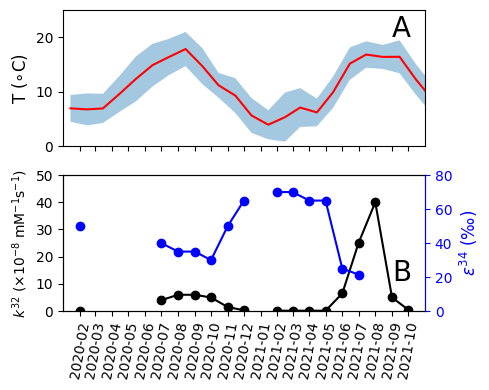

In [ ]:
#plot the k and alpha value
date = {2020:[2,3,4,5,6,7,8,9,10,11,12], 2021:[1,2,3,4,5,6,7,8,9,10]}
date = {2020:[2,3,4,5,6,7,8,9,10,11,12], 2021:[1,2,3,4,5,6,7,8,9,10]}

k_value= [0.03,'nan','nan','nan','nan' ,4 ,6 ,6 ,5 ,1.5 ,0.3,'nan',0.15 ,0.15 ,0.15 ,0.15, 6.5 ,25 ,40,5,
              0.5]
#unit is e-8/mM/s
alpha = [0.95,'nan','nan','nan','nan' , 0.96, 0.965,0.965,0.97,0.95,0.935,'nan',0.93,0.93,0.935,0.935,0.975,0.9785,'nan','nan','nan']
epsilon =[]
epsilon =[]

for a in alpha:
  if a == 'nan':
    eps = 'nan'
    epsilon.append(eps)
    continue
  eps = (1-a) *1000
  epsilon.append(eps)

epsilon_df = pd.DataFrame({'e':epsilon})


time = []
i = 0
for key in date.keys():
  for value in date[key]:
    a = f'{key}-{value}'
    t = pd.to_datetime(a)
    time.append(t)
    i = i +1
time_df = pd.DataFrame({'time':time})
k_df = pd.DataFrame({'k':k_value})

fig, ax = plt.subplots(nrows =2,ncols = 1,figsize = [5,4], sharex = 'col')

ax[0].plot(T_month.index,T_month['air T(C)'],c ='r', linewidth = 1.5)
ax[0].fill_between(T_month.index, T_month['air T(C)']-T_mon_std['air T(C)'],T_month['air T(C)']+T_mon_std['air T(C)'], alpha = 0.4)
ax[0].set_ylim([0 , 25])
ax[0].set_ylabel('T ($\circ$C)',fontsize = 12)
ax[0].set_xticks(ticks = time)
ax[0].set_xlim([pd.to_datetime('2020-01-01'), pd.to_datetime('2021-11-01')])
fig.autofmt_xdate(rotation=80,ha='center')

ax2 = ax[1].twinx()
ax[1].plot(time, k_df, c = 'k')
ax2.plot(time, epsilon_df, c = 'b')
ax[1].scatter(time, k_value, c = 'k')
ax2.scatter(time, epsilon, c = 'b')
ax[1].set_ylim([0, 50])
ax2.set_ylim([0, 80])

ax[1].set_ylabel(r'$k^{32}$ ($\times 10^{-8}$ mM$^{-1}$s$^{-1}$)' , color = 'k',fontsize = 10)
ax2.set_ylabel(r'$\epsilon^{34}$ ($\perthousand$)',color = 'b', fontsize = 12)

label = ['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01',
                        '2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10']
ax[1].set_xticks(ticks = time, labels = label)
ax2.set_yticks(ticks = [0,20,40,60,80], labels = [0,20,40,60,80], color = 'b')
ax[1].set_yticks(ticks = [0,10,20,30,40,50], labels = [0,10,20,30,40,50], color = 'k')
ax[1].tick_params(axis='y', colors='k')
ax2.tick_params(axis='y', colors='b')
ax[1].spines['right'].set_color('k')
ax2.spines['right'].set_color('b')
fig.autofmt_xdate(rotation=80,ha='center')
ax[1].set_xlim([pd.to_datetime('2020-01-01'), pd.to_datetime('2021-11-01')])
ax[0].text(pd.to_datetime(['2021-09-01']),20,'A', fontsize = 20)
ax[1].text(pd.to_datetime(['2021-09-01']),11,'B', fontsize = 20)
plt.tight_layout()
plt.savefig("k_mon.pdf",format = 'pdf', dpi=300)
files.download("k_mon.pdf")

In [ ]:
model_data = pd.read_excel('model_k_alpha.xlsx')
model_data['log(k)']= np.log10(model_data['k (10-8 s-1)']*(10**(-8)))

fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize=(9, 3))

sbn.regplot(data= model_data, x='T ', y= 'epsilon (‰)',ax = axs[1],dropna=True)
sbn.regplot(data= model_data, x='T ', y= 'log(k)',ax = axs[0],dropna=True)
sbn.regplot(data= model_data, x='epsilon (‰)', y= 'log(k)',ax = axs[2],dropna=True)

axs[0].set_xlabel('T ($\circ$C)', fontsize = 11)
axs[0].set_ylabel('log($k^{32}$)', fontsize = 11)
axs[1].set_xlabel('T ($\circ$C)', fontsize = 11)
axs[1].set_ylabel(r'$\epsilon^{34}$ ($\perthousand$)', fontsize = 11)
axs[2].set_xlabel(r'$\epsilon^{34}$ ($\perthousand$)', fontsize = 11)
axs[2].set_ylabel(r'log($k^{32}$)', fontsize = 11)



axs[0].text(1,-6.4,'A', fontsize = 20)
axs[1].text(1,70,'B', fontsize = 20)
axs[2].text(12,-6.4,'C', fontsize = 20)

axs[0].set_xlim([0, 20])
axs[1].set_xlim([0, 20])
axs[2].set_xlim([10, 80])
axs[0].set_ylim([-9, -6])
axs[1].set_ylim([10, 80])
axs[2].set_ylim([-9, -6])

axs[0].text(1,-7,f'r$^2$ = 0.74, p < 0.01', fontsize = 11, c ='r')
axs[1].text(1,20,f'r$^2$ = 0.73,p < 0.01', fontsize = 11, c ='r')
axs[2].text(12,-8.75,f'r$^2$ = 0.96, p < 0.01', fontsize = 11, c ='r')

plt.tight_layout()

plt.savefig("corr_k_T.pdf",format = 'pdf', dpi=300)
files.download("corr_k_T.pdf")


FileNotFoundError: [Errno 2] No such file or directory: 'model_k_alpha.xlsx'

In [ ]:
T_month.to_excel('ave_T.xlsx')
files.download('ave_T.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

model_data = pd.read_excel('model_k_alpha.xlsx')
model_data['log(k)']= np.log10(model_data['k (10-8 s-1)']*(10**(-8)))
model_data

,Year,Month,k (10-8 s-1),log(k),alpha,epsilon (‰),T,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,7.0,2.50,-7.602060,0.955,45.0,16.9,NaN
2,2020.0,8.0,2.50,-7.602060,0.960,40.0,19.0,NaN
3,2020.0,9.0,3.50,-7.455932,0.965,35.0,14.9,NaN
4,2020.0,10.0,4.00,-7.397940,0.960,40.0,11.0,NaN
5,2020.0,11.0,1.50,-7.823909,0.935,65.0,8.7,NaN
6,2020.0,12.0,0.50,-8.301030,0.930,70.0,4.9,NaN
7,2021.0,2.0,0.20,-8.698970,0.930,70.0,5.1,NaN
8,2021.0,3.0,0.20,-8.698970,0.930,70.0,7.1,NaN
9,2021.0,4.0,0.20,-8.698970,0.930,70.0,6.3,NaN


,k (10-8 s-1),log(k),alpha,epsilon (‰),T
k (10-8 s-1),1.000000,0.836114,0.706305,-0.706305,0.511306
log(k),0.836114,1.000000,0.764209,-0.764209,0.742708
alpha,0.706305,0.764209,1.000000,-1.000000,0.873156
epsilon (‰),-0.706305,-0.764209,-1.000000,1.000000,-0.873156
T,0.511306,0.742708,0.873156,-0.873156,1.000000


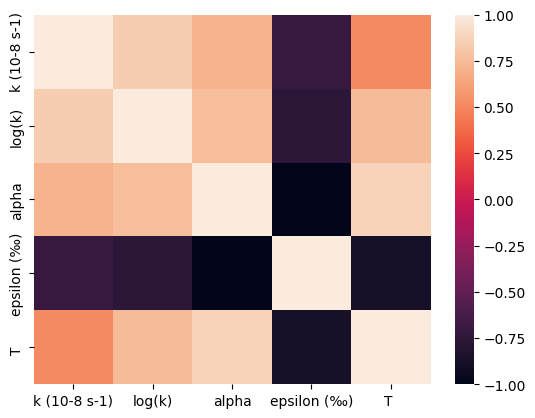

In [ ]:
a = model_data.loc[:,'k (10-8 s-1)':'T ']
corr_k_a = a.corr(method='pearson')
sbn.heatmap(corr_k_a)
corr_k_a

In [ ]:
import numpy as np
from scipy import stats
x, y,z = model_data.loc[1:,'log(k)'], model_data.loc[1:,'T '],model_data.loc[:,'epsilon (‰)']
y_drope =model_data.loc[1:12,'T ']
z_drope =model_data.loc[1:12,'epsilon (‰)']
x_drope=model_data.loc[1:12,'log(k)']
k_T = stats.pearsonr(x, y)

k_e =stats.pearsonr(x_drope, z_drope)
T_e =stats.pearsonr(y_drope, z_drope)

print(k_e,T_e)

PearsonRResult(statistic=-0.7642092315937523, pvalue=0.0038030534071447093) PearsonRResult(statistic=-0.8731559876430078, pvalue=0.0002082120702190379)


,date,Tidal frequency > 5.3,Tidal frequency > 5,T,Rain,Pressure,Sun,d34S_max,d34S_surface,SCl_surface,Cl_mean
date,1.000000,-0.230756,-0.122802,0.207124,-0.270823,0.368326,0.202868,0.796177,0.330175,-0.730268,0.395780
Tidal frequency > 5.3,-0.230756,1.000000,0.817731,-0.216853,0.082921,-0.013336,-0.428766,-0.379804,-0.550052,0.353302,-0.255729
Tidal frequency > 5,-0.122802,0.817731,1.000000,0.155779,-0.015158,0.151210,-0.187548,-0.394621,-0.064862,0.195470,0.074513
T,0.207124,-0.216853,0.155779,1.000000,0.003984,0.186310,0.588870,0.097762,0.921996,-0.597816,0.781162
Rain,-0.270823,0.082921,-0.015158,0.003984,1.000000,-0.911955,-0.426451,-0.171565,0.063345,0.146468,-0.168971
Pressure,0.368326,-0.013336,0.151210,0.186310,-0.911955,1.000000,0.545523,0.143548,0.120679,-0.216933,0.231489
Sun,0.202868,-0.428766,-0.187548,0.588870,-0.426451,0.545523,1.000000,0.106562,0.574035,-0.425808,0.548136
d34S_max,0.796177,-0.379804,-0.394621,0.097762,-0.171565,0.143548,0.106562,1.000000,0.309192,-0.667111,0.146588
d34S_surface,0.330175,-0.550052,-0.064862,0.921996,0.063345,0.120679,0.574035,0.309192,1.000000,-0.641828,0.712471
SCl_surface,-0.730268,0.353302,0.195470,-0.597816,0.146468,-0.216933,-0.425808,-0.667111,-0.641828,1.000000,-0.429175


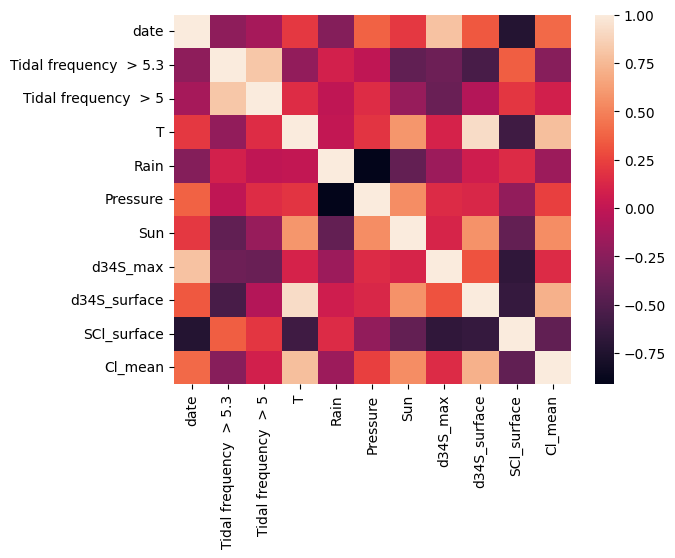

In [ ]:
#correlation plot for other environmental variables and geochemical data
envir_factoor_Fe = pd.read_excel("envir_factor_Fe.xlsx")
envir_factoor_S = pd.read_excel("envir_factor_S.xlsx")
corr_envir_Fe = envir_factoor_Fe.corr(method='pearson')
corr_envir_S = envir_factoor_S.corr(method='pearson')
sbn.heatmap(corr_envir_Fe)
corr_envir_Fe

